
# ARIMA and Seasonal ARIMA






In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df=pd.read_csv('perrin-freres-monthly-champagne.csv')

In [31]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [32]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [33]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [34]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [35]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [36]:
df.drop(105,axis=0,inplace=True)

In [37]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [38]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [39]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [40]:
df.set_index('Month',inplace=True)

In [41]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [42]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Data Visualization

<AxesSubplot:xlabel='Month'>

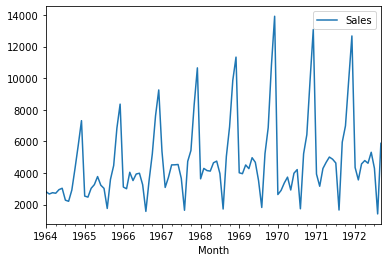

In [43]:
df.plot()

In [44]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [45]:
test_result=adfuller(df['Sales'])

In [46]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [47]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [48]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [49]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [50]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [51]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [52]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

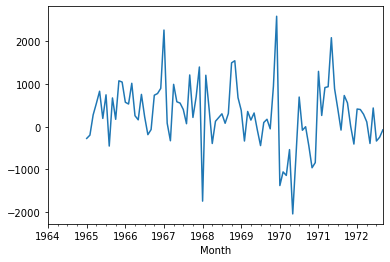

In [53]:
df['Seasonal First Difference'].plot()

## Autoregressive model

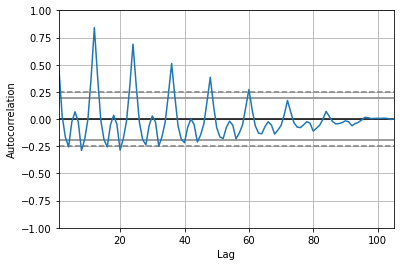

In [54]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

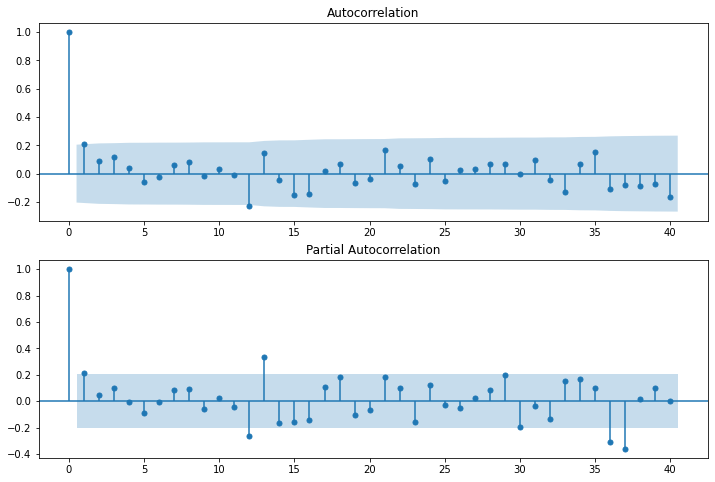

In [56]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [57]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model=ARIMA(df['Sales'],order=(3,1,3))
model_fit=model.fit()

E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -936.366
Method:                       css-mle   S.D. of innovations           1911.234
Date:                Wed, 01 Dec 2021   AIC                           1888.732
Time:                        19:29:08   BIC                           1909.887
Sample:                    02-01-1964   HQIC                          1897.302
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.8220     13.056      2.054      0.040       1.232      52.412
ar.L1.D.Sales     0.5372      0.120      4.469      0.000       0.302       0.773
ar.L2.D.Sales     0.3009      0.148      2.033      0.042       0.011       0.591
ar.L3.D.Sales    -0.3688      0.113     -3.271      0.001      -0.590      -0.148
ma.L1.D.Sales    -1.0674      0.085    -12.507      0.000      -1.235      -0.900
ma.L2.D.Sales    -0.7298      0.123     -5.920      0.000      -0.971      -0.488
ma.L3.D.Sales     0.8336      0.075     11.043      0.000       0.686       0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4583           -0.0000j            1.4583           -0.5000
AR.2            1.1371           -0.7527j            1.3637           -0.0931
AR.3            1.1371           +0.7527j            1.3637            0.0931
MA.1           -1.1486           -0.0000j            1.1486           -0.5000
MA.2            1.0121           -0.1420j            1.0220           -0.0222
MA.3            1.0121           +0.1420j            1.0220            0.0222
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

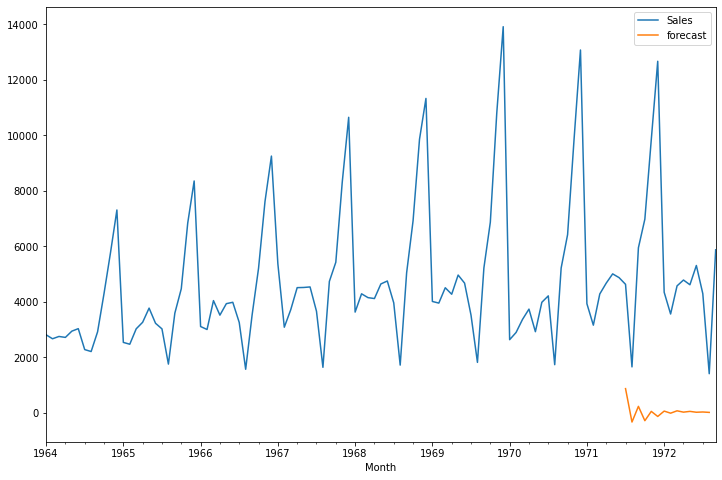

In [60]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [61]:
import statsmodels.api as sm

In [62]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(3, 1, 3),seasonal_order=(3,1,3,12))
results=model.fit()

E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Month'>

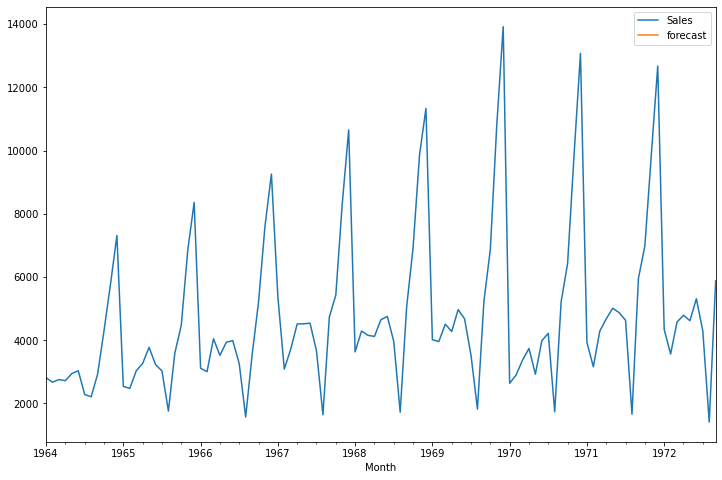

In [63]:
df['forecast']=results.predict(start=170,end=191,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [64]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [65]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [66]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [67]:
future_df=pd.concat([df,future_datest_df])

E:\Anaconda\Program Data\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

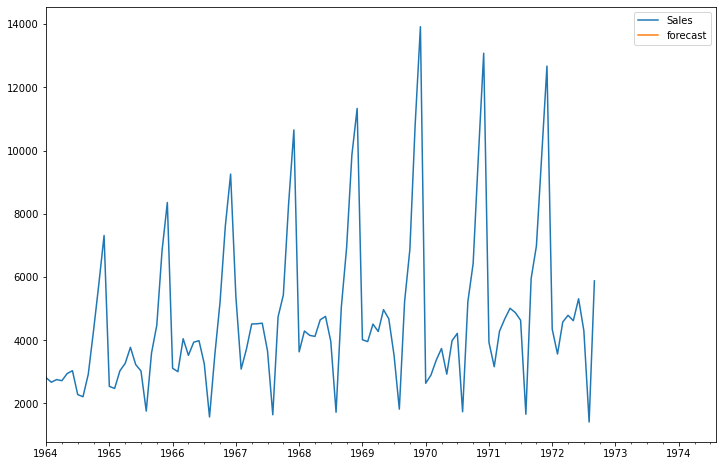

In [68]:
future_df['forecast'] = results.predict(start = 178, end = 200, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 